# フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

- [Iris setosa - Wikipedia](https://diver.diveintocode.jp/curriculums/1633)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

^^^NB: No space between ```[blue_text](url)```

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 【問題1】データの取得

以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)


データが読み込めたら、説明変数をPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。
目的変数も同様にyに格納してください。

[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 


X =
<br> 
Y = 

In [2]:
# Load dataset into an object

'''
Dictionary-like object, with the following attributes.
i.e. - 'keys': values
'''

data_set = load_iris() #from sklearn import datasetsでボストンなど他のデータセットも取得可能
data_set

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Explore various key-values

print(data_set['target_names'])
print(data_set.target_names)
data_set.target_names # shows array/dtype

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data_set.target_names[2]

'virginica'

In [5]:
data_set.target.shape

(150,)

In [6]:
#label of the 35th sample

data_set.target_names[data_set.target[34]]

'setosa'

In [7]:
#features of the 35th sample

data_set.data.shape

(150, 4)

In [8]:
data_set.data[34,:]

array([4.9, 3.1, 1.5, 0.2])

In [9]:
#load data as pandas dataframe

X = pd.DataFrame(data=data_set.data)
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Y = pd.DataFrame(data=data_set.target)
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 【問題2】データの結合

問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [11]:
# Incorrect example - stacked dfs along the default axis=0 which is the vertical line
df_wrong = pd.concat([X, Y])
print(df_wrong.shape)
df_wrong

(300, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,2.0,NaN,NaN,NaN
146,2.0,NaN,NaN,NaN
147,2.0,NaN,NaN,NaN
148,2.0,NaN,NaN,NaN


In [12]:
#Correct answer

df = pd.concat([X, Y], axis=1)
frames = [X, Y]
print(df.shape)
print(type(df))
df

(150, 5)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
#pd.concat - INCORRECT EXAMPLE
#keys=のキーワードになぜか変数を入れることができないのか？出力しても同じようなデータタイプに見えるが？？
names = list(data_set.target_names)
print(names)
result = pd.concat(frames, keys=['setosa', 'versicolor', 'virginica'])
result2 = pd.concat(frames, keys=names) #error
result3 = pd.concat(frames, keys=[names]) #error
print(result)

['setosa', 'versicolor', 'virginica']


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Merge/Joinも自習で検討すべき

### 【問題3】データの確認

今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [14]:
#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df.head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
#ラベルごとのサンプル数の合計を出力する。
#>>data_set.feature_namesのfeature_namesが更新されて、原型がメモリーから消えている？？？
#>>このような場合、append()を使うと問題が色々と生じそう＞その他のアプローチは？

'''
print(feature_names)
data_set.feature_names.remove('flower labels')
'''

feature_names = data_set.feature_names
feature_names.append('flower labels')

print(feature_names)
data_set.feature_names


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'flower labels']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'flower labels']

In [16]:
#data_set.feature_names.remove('flower labels')
print(feature_names)

df.columns = [feature_names] #double brackets required as there is an error

print(df.shape)
print(type(df))

df


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'flower labels']
(150, 5)
<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
#色々と検討して調べてみたが、.value_counts()のエラーが理解できない
df['flower labels'].value_counts()

TypeError: only integer scalar arrays can be converted to a scalar index

In [18]:
#Question? Error
df.value_counts(df['flower labels'])

TypeError: only integer scalar arrays can be converted to a scalar index

In [19]:
#Another error
df.groupby(df['flower labels']).value_counts()

TypeError: only integer scalar arrays can be converted to a scalar index

In [20]:
new_df = df.groupby('flower labels')
new_df

TypeError: only integer scalar arrays can be converted to a scalar index

In [21]:
df['petal length (cm)'].count()

TypeError: only integer scalar arrays can be converted to a scalar index

In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
df['sepal length (cm)'].value_counts()

TypeError: only integer scalar arrays can be converted to a scalar index

In [24]:
iris_data = load_iris()

'''
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
'''

df_new = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['labels'])
print(type(df_new))
df_new

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [25]:
#ラベルごとのサンプル数の合計を出力する
df_new['labels'].value_counts(dropna=False)

2.0    50
1.0    50
0.0    50
Name: labels, dtype: int64

In [26]:
print(df[df_new['labels'] == 0].info())
print(df[df_new['labels'] == 1].info())
print(df[df_new['labels'] == 2].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  50 non-null     float64
 1   (sepal width (cm),)   50 non-null     float64
 2   (petal length (cm),)  50 non-null     float64
 3   (petal width (cm),)   50 non-null     float64
 4   (flower labels,)      50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  50 non-null     float64
 1   (sepal width (cm),)   50 non-null     float64
 2   (petal length (cm),)  50 non-null     float64
 3   (petal width (cm),)   50 non-null     float64
 4   (flower labels,)      50 non-null     int64  
dtypes: float64(4), int64(

In [27]:
print(df[df_new['labels'] == 2].count())

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
flower labels        50
dtype: int64


In [28]:
df_new.groupby('labels').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0.0,50,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [29]:
#特徴量に欠損値があるかを確認する
df_new['sepal length (cm)'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal length (cm), Length: 150, dtype: bool

In [30]:
#特徴量に欠損値があるかを確認する
df_new.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [31]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる
df_new.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 【問題4】irisデータセット自体の調査

データセットに関する情報：

[Iris data](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)

3種類のアヤメに関する情報。

- [Iris setosa - Wikipedia](https://diver.diveintocode.jp/curriculums/1633)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)


## 5.特徴量についての探索

各特徴量や特徴量同士の関係を見ていきます。

### 【問題5】必要なデータを抽出

DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。



In [32]:
# sepal_widthの列を３つの異なる方法で抽出する

#Method 1 - standard method (.column_name if no spaces)
col_one = df_new['sepal width (cm)']
print(col_one)

#Method 2 - iloc on all rows for the specific column
col_two = df_new.iloc[:]['sepal width (cm)']
print(col_two)

#Method 3 - filter df for columns like 'sepal width'
col_three = df_new.filter(like='sepal width')
print(col_three)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
     sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
..                ...
145               3.0
146               2.5
147               3.0
148               3.4
149               3.0

[150 rows x 1 columns]


In [33]:
#50番目から99番目までのデータを抽出する -> 0 start n-1

slice = df_new.iloc[49:98]
print(slice)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   
55                5.7               2.8                4.5               1.3   
56                6.3               3.3                4.7               1.6   
57                4.9               2.4                3.3               1.0   
58                6.6               2.9                4.6               1.3   
59                5.2               2.7                3.9               1.4   
60                5.0               2.0 

In [34]:
#petal_lengthの列の50番目から99番目までのデータを抽出する -> 0 start n-1

slice_pet_length = df_new.iloc[49:99]['petal length (cm)']
print(slice_pet_length)

49    1.4
50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
Name: petal length (cm), dtype: float64


In [35]:
#petal_widthの値が0.2のデータを抽出する

pet_width_02 = df[df_new['petal width (cm)'] == 0.2]
print(pet_width_02)

   sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  \
0                5.1              3.5               1.4              0.2   
1                4.9              3.0               1.4              0.2   
2                4.7              3.2               1.3              0.2   
3                4.6              3.1               1.5              0.2   
4                5.0              3.6               1.4              0.2   
7                5.0              3.4               1.5              0.2   
8                4.4              2.9               1.4              0.2   
10               5.4              3.7               1.5              0.2   
11               4.8              3.4               1.6              0.2   
14               5.8              4.0               1.2              0.2   
20               5.4              3.4               1.7              0.2   
22               4.6              3.6               1.0              0.2   
24          

### 問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

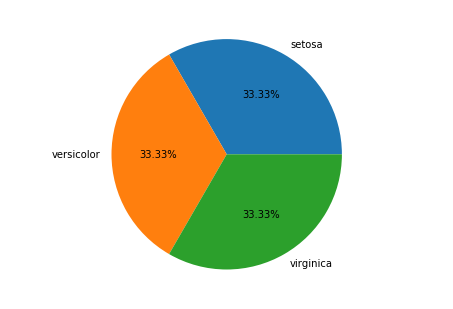

In [36]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

data_labels = list(iris_data['target_names'])
count_labels = list(df_new['labels'].value_counts())


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

plt.pie(count_labels, labels=data_labels, autopct='%1.2f%%')
plt.show()

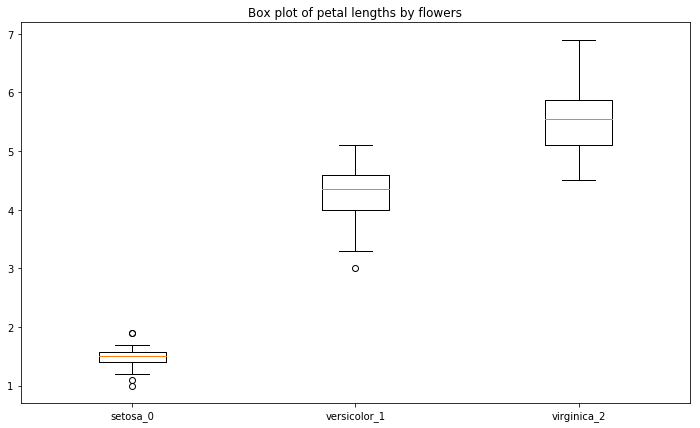

In [37]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
label_0 = df_new[df_new['labels']==0]
label_1 = df_new[df_new['labels']==1]
label_2 = df_new[df_new['labels']==2]

#ラベルごとのデータの分布 petal length (cm) 
setosa_0 = label_0['petal length (cm)']
versicolor_1 = label_1['petal length (cm)']
virginica_2 = label_2['petal length (cm)']

box_plot_data = [setosa_0, versicolor_1, virginica_2]
label_data = ['setosa_0', 'versicolor_1','virginica_2']
#fig = plt.figure()
fig, ax2 = plt.subplots(figsize=(12, 7)) #why does this need to be unpacked into fig and ax2??
#ax2 = fig.add_axes([0, 0, 1, 1]) 
ax2.set_title('Box plot of petal lengths by flowers')
#ax2.set_xticks([box_plot_data]) 
#ax2.set_xticklabels(['setosa_0', 'versicolor_1','virginica_2']) 
#plt.xticks(np.arange(len(box_plot_data)), box_plot_data)
ax2.boxplot(box_plot_data, labels=label_data) 
plt.show()

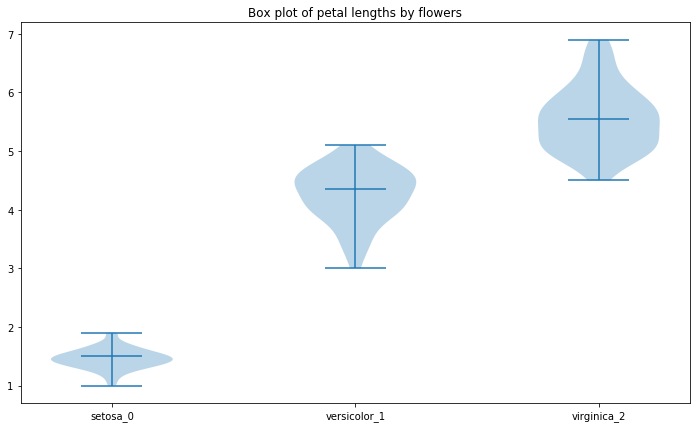

In [38]:
#特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

box_plot_data = [setosa_0, versicolor_1, virginica_2]
label_data = ['setosa_0', 'versicolor_1','virginica_2']
#fig = plt.figure()
fig, ax2 = plt.subplots(figsize=(12, 7)) #why does this need to be unpacked into fig and ax2??
#ax2 = fig.add_axes([0, 0, 1, 1]) 
ax2.set_title('Box plot of petal lengths by flowers')
ax2.set_xticks([1, 2, 3]) 
ax2.set_xticklabels(['setosa_0', 'versicolor_1','virginica_2']) 
#plt.xticks(np.arange(len(box_plot_data)), box_plot_data)
ax2.violinplot(box_plot_data, showmedians=True) 
plt.show()

### 箱ひげ図vsバイオリン図の違いについて

- 箱ひげ図では、四分位数の第三四分位数（７５％）から第一四分位数（２５％）が箱に囲まれているのがわかりますが、全体的な数値のばらつき・偏りは可視化されていません。バイオリン図では、第三四分位数（７５％）から第一四分位数（２５％）の箱が無い一方で、分布の形を左右対称に描いているので、ばらつき・偏りは見やすい。
- 上記の箱ひげ図では、そのほかに外れ値が点で表示されている。
- 最大値・最小値・中央値には上記の２つのグラフに違いはない

### 【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。


- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る(１つ)

In [77]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
import itertools
import math

def combinations_count(n, r):
    combinations = math.factorial(n) / (math.factorial(r) * math.factorial(n - r))
    return combinations

total_no_charts = combinations_count(4, 2)
total_no_charts

6.0

In [40]:
list_of_columns = list(df_new.columns[:4])
list_of_combinations = list(itertools.combinations(list_of_columns, 2))
print(list_of_columns)
print(list_of_combinations)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal width (cm)'), ('petal length (cm)', 'petal width (cm)')]


In [42]:
explore = df_new[list_of_combinations[i][0]]
explore

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [51]:
labels_iris = list(df_new['labels'])


color1=(0.69411766529083252, 0.3490196168422699, 0.15686275064945221, 1.0)
color2=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)
color3=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0)

colormap = np.array([color1,color2,color3])

labels_iris

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

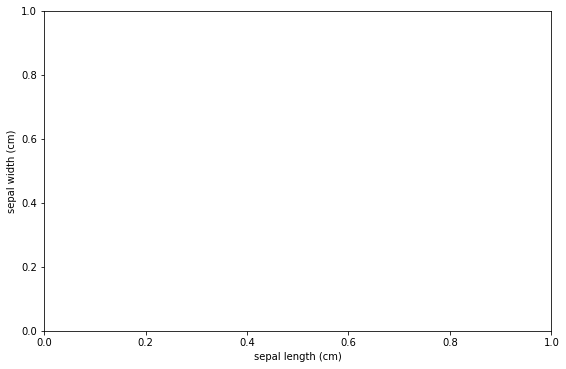

In [72]:
#Unresolved error!
#plot all 6 scatters
plt.figure(figsize=(20,20))
for i in range(len(list_of_combinations)):
    plt.subplot(3, 2, i+1)
    plt.xlabel(list_of_combinations[i][0])
    plt.ylabel(list_of_combinations[i][1])
    plt.scatter(df_new[list_of_combinations[i][0]], df_new[list_of_combinations[i][1]], color=colormap[labels_iris]) #https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/#:~:text=To%20change%20the%20color%20of,c%22%20in%20the%20function%20scatter.
plt.show()

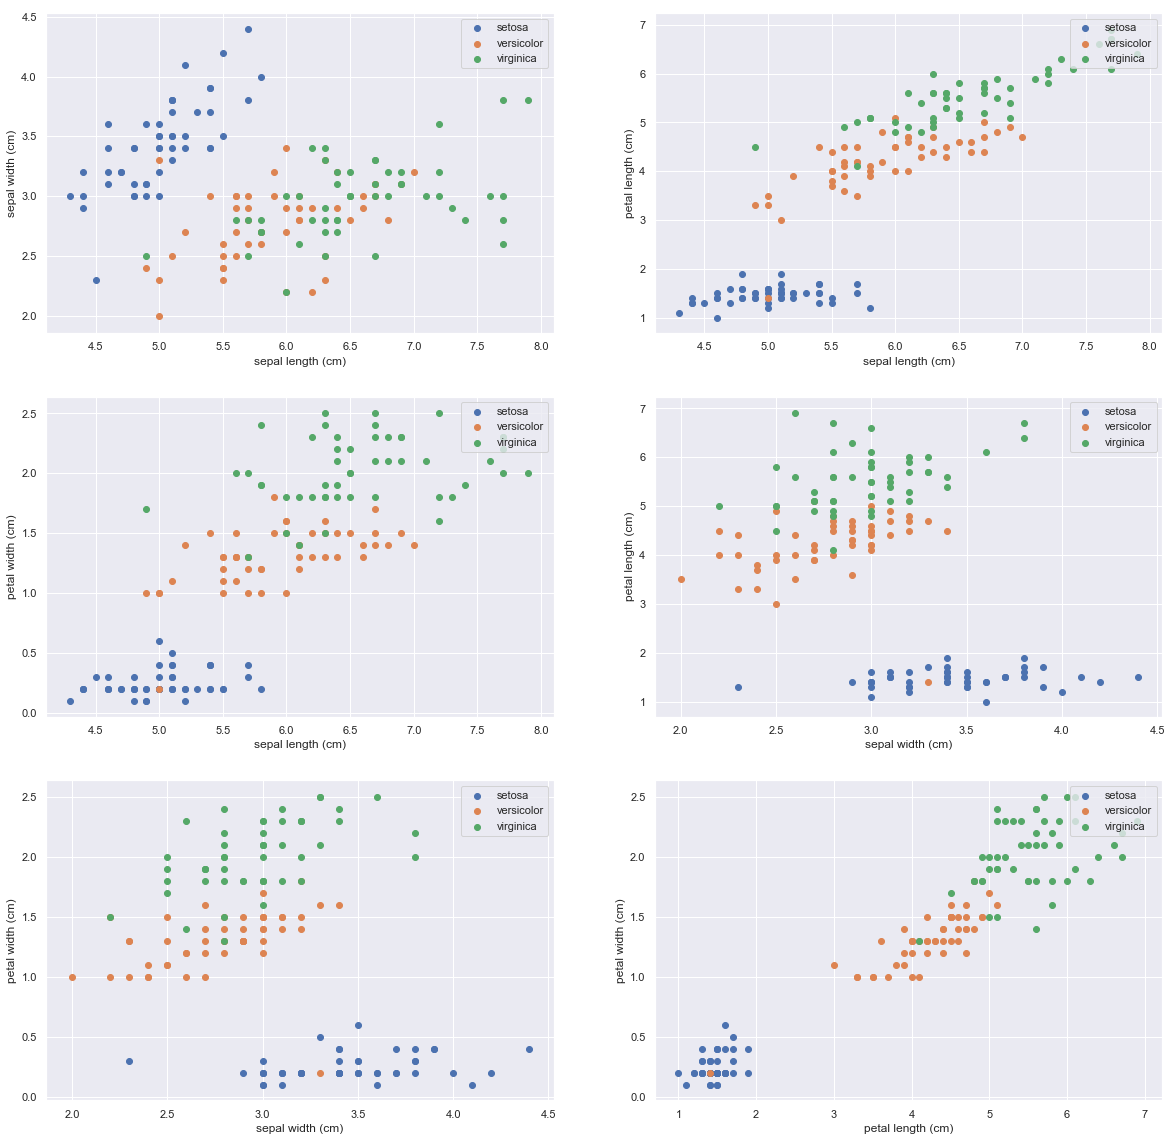

In [101]:
plt.figure(figsize=(20,20))
for i in range(len(list_of_combinations)):
    plt.subplot(3, 2, i+1)
    plt.xlabel(list_of_combinations[i][0])
    plt.ylabel(list_of_combinations[i][1])
    zero = plt.scatter(df_new.iloc[:49][list_of_combinations[i][0]], df_new.iloc[:49][list_of_combinations[i][1]], label='setosa')
    one = plt.scatter(df_new.iloc[49:99][list_of_combinations[i][0]], df_new.iloc[49:99][list_of_combinations[i][1]], label='versicolor')
    two = plt.scatter(df_new.iloc[99:149][list_of_combinations[i][0]], df_new.iloc[99:149][list_of_combinations[i][1]], label= 'virginica')
    plt.legend((zero, one, two), ("setosa", "versicolor", "virginica"), loc='upper right')
    #key is to separate the 3 label outputs and plot them separately
plt.show()

In [ ]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

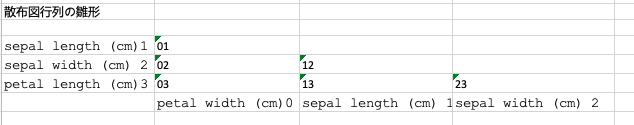

sepal length (cm) sepal width (cm)
sepal length (cm) petal length (cm)
sepal length (cm) petal width (cm)
sepal width (cm) petal length (cm)
sepal width (cm) petal width (cm)
petal length (cm) petal width (cm)


IndexError: list index out of range

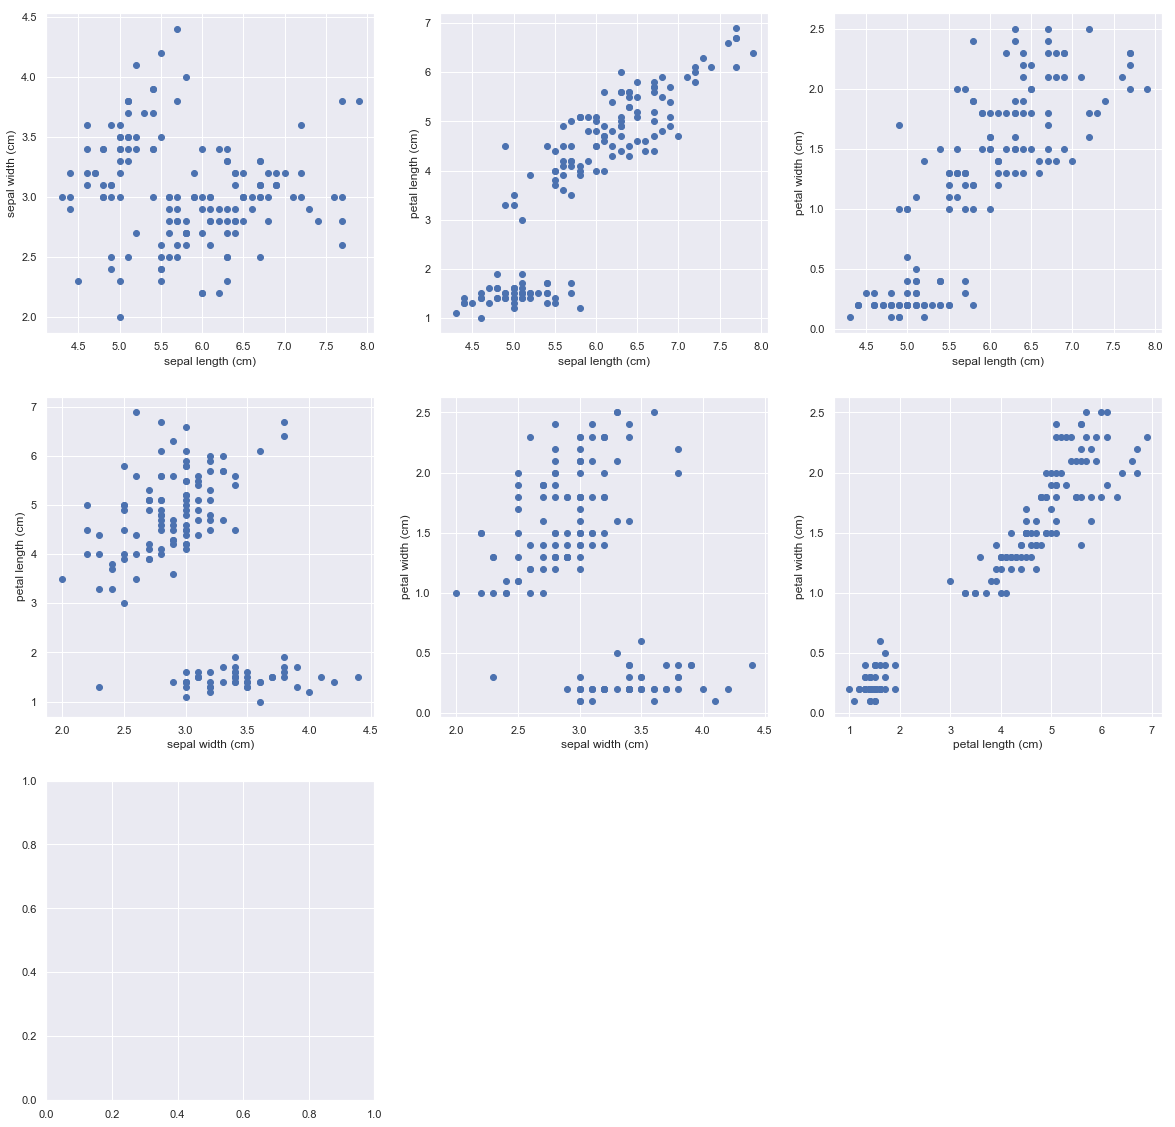

In [86]:
# Failed attempt at creating graph from scratch - Matplotlib

plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    print(list_of_combinations[i][0], list_of_combinations[i][1])
    plt.xlabel(list_of_combinations[i][0])
    plt.ylabel(list_of_combinations[i][1])
    plt.scatter(df_new[list_of_combinations[i][0]], df_new[list_of_combinations[i][1]])
    #slice_pet_length = df_new.iloc[49:99]['petal length (cm)']
plt.show()

/Users/MatthewH/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


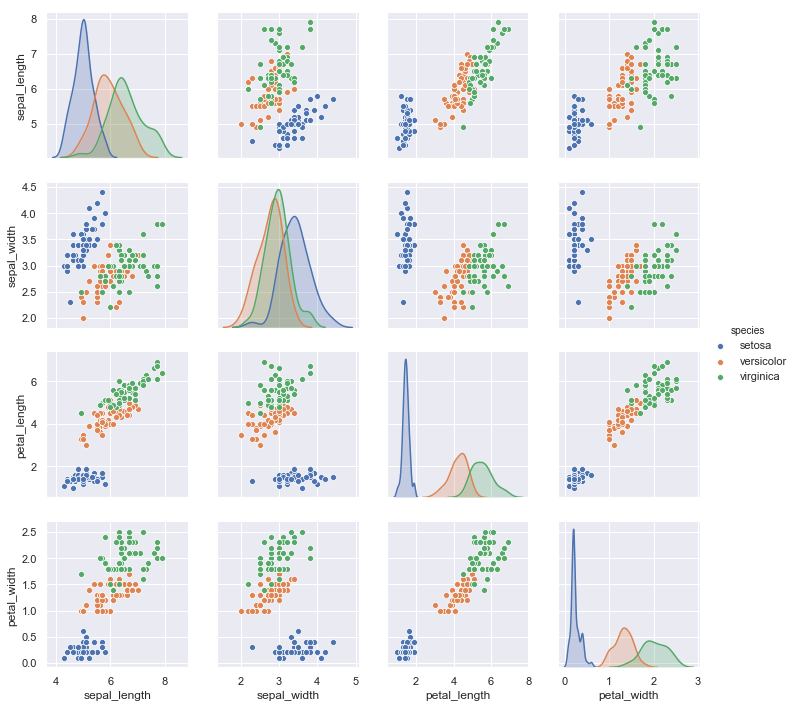

In [75]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

import seaborn as sns
sns.set()
scatter_matrix = sns.load_dataset("iris")
sns.pairplot(scatter_matrix, hue="species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36d4fe10>,
      dtype=object)

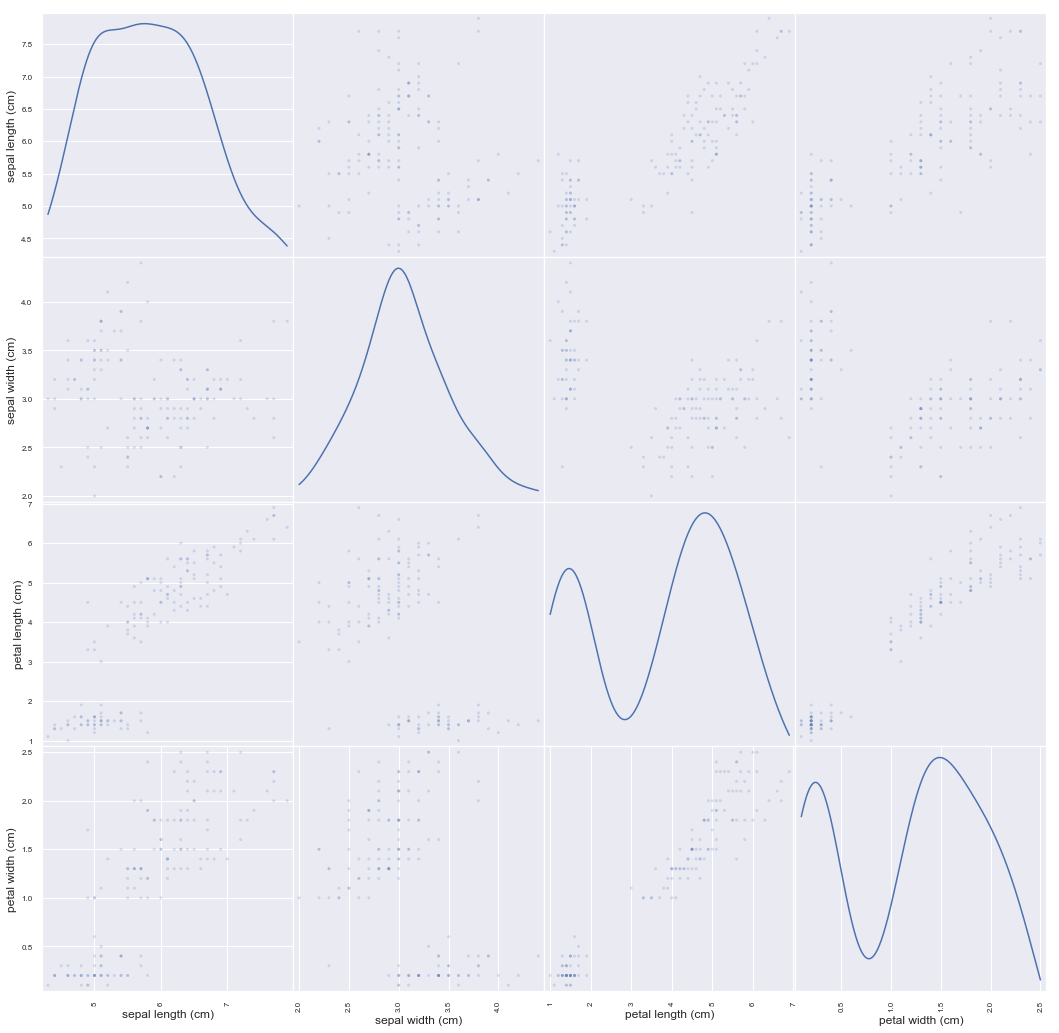

In [100]:
#pandas
'''
https://www.it-swarm-ja.tech/ja/python/matplotlib%E3%81%AB%E6%95%A3%E5%B8%83%E5%9B%B3%E8%A1%8C%E5%88%97%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%E9%96%A2%E6%95%B0%E3%81%AF%E3%81%82%E3%82%8A%E3%81%BE%E3%81%99%E3%81%8B%EF%BC%9F/941596887/
'''
from pandas.plotting import scatter_matrix
scatter_matrix(df_new.iloc[:, :4], alpha = 0.2, figsize = (18, 18), diagonal='kde')

In [194]:
#４つの特徴量に関する相関係数行列を作る
features_df = df_new[list_of_columns]
correlation_matrix = features_df.corr(method='pearson')
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


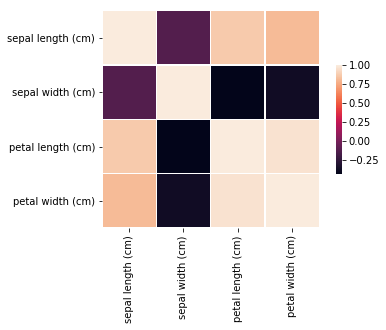

In [201]:
#Heat map
import seaborn as sns


'''
plt.xlabel("features")
plt.ylabel("featues")
plt.title("heatmap of correlation matrix")
plt.pcolor(np.linspace(-1, 1, 16).reshape(4, 4)) #four rows, 2 columns => understand how it reshapes!
plt.colorbar() #shows what the change in color represents
plt.show()
'''

sns.heatmap(correlation_matrix, square=True, linewidths=.5, cbar_kws={"shrink": .5})

【問題8】可視化したグラフや表の結果の説明

データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

- setosaは、散布図にある各特徴量に対して明確な分類（線形を用いた）ができそうだ
- "versicolor", "virginica"は、特徴量によって（sepal width/length)数値が散在しているところもある
- 分類にさいしてどのような特徴量がこの２つのラベルの分類に有用かは、petal_width/lengthになるとうかがえる＞virginicaの方がversicolorより多少ではあるもののほぼ全てのサンプルにおいて大きいことがわかる